In [1]:
library(DescTools)
library(ggplot2)
library(readr)
suppressWarnings(library(dplyr))
library(visNetwork)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'visNetwork' was built under R version 3.4.1"

# ICO analiza: SNC

### 1) Osnovni podatki o ICO obdobju:

- trajanje: 28.6.2017 - 1.8.2017
- št. zbranih ETH tokenov: 8732
- št. vlagateljev: 2274

(Vir: https://suncontract.org/ )

Za analizo porazdelitve vložkov sem zajel vse transakcije na njihov javni "ICO" naslov z etherscana: 
https://etherscan.io/txs?a=0x5fb3d432bae33fcd418ede263d98d7440e7fa3ea

In [2]:
data <- read_csv('SNC.csv')
data$value <- data$value / 10**18
data$timeStamp <- as.POSIXct(data$timeStamp,origin="1970-01-01",tz="GMT")
data <- data[data$value > 0,] #odstranim transakcije, kjer je value 0
head(data)

Parsed with column specification:
cols(
  blockNumber = col_integer(),
  timeStamp = col_integer(),
  from = col_character(),
  to = col_character(),
  value = col_double()
)


blockNumber,timeStamp,from,to,value
3942170,2017-06-28 09:42:14,0xcd17c7aa5db10d5de82611216a31fe2b5f95c019,0x5fb3d432bae33fcd418ede263d98d7440e7fa3ea,0.0100000
3943066,2017-06-28 14:11:33,0xaaa4fcd0776cb3c5872af2ea896fe59e8d27b4a9,0x5fb3d432bae33fcd418ede263d98d7440e7fa3ea,0.0676484
3943104,2017-06-28 14:22:35,0x00d4861037f5978c018816668fa302cfbd550114,0x5fb3d432bae33fcd418ede263d98d7440e7fa3ea,299.9790000
3943182,2017-06-28 14:46:31,0xa45315981a6197b63ecb721385f2fbca3c6b4bb9,0x5fb3d432bae33fcd418ede263d98d7440e7fa3ea,0.3490000
3943225,2017-06-28 15:00:23,0xfb9a79d649b742fef6e1f7c036987198e2283162,0x5fb3d432bae33fcd418ede263d98d7440e7fa3ea,2.1720000
3943238,2017-06-28 15:04:28,0xe5540b5f89d84893833ab4d1a77d37ccb3e33890,0x5fb3d432bae33fcd418ede263d98d7440e7fa3ea,9.8000000


Število zbranih ETH(tokenov) po tabeli, se ne ujema s podatki z njihove spletne strani. Tu skupno število znaša 11555, na spletni strani je navedno 8732. (?)

In [4]:
round(sum(data$value),0)

[1] 11555

Prav tako se ne ujema število vlagateljev, ki je po tabeli 2409 (na spletni strani navajajo 2274). (?)

In [6]:
length(unique(data$from))

[1] 2409

### 2) Distrubucija skozi čas

VPRAŠANJA (alineje) IZ MAILA: 
##### - distribucija (skozi cas)
##### - koliko se zbere skozi preICO
##### -  kako pada attention skozi cas


OPIS:
Tabela prikazuje število vloženih ETH tokenov (stolpec sum) in število vložkov (stolpec count) za vsak dan ICOta. Spodaj sta oba stolpca prikazana še grafično. 

In [4]:
tmp <- split(data, cut(strptime(data$timeStamp, format="%F %R"),"day"))
df <- data.frame(Date=as.Date(as.character()), sum=numeric(),count=numeric(), stringsAsFactors=FALSE)
for (i in c(1:35)) {
    day <- tmp[[i]]
    vec <- c(day$timeStamp[[1]], sum(day$value),length(day$value))
    df <- rbind(df, vec)
    }
colnames(df)<- c("date", "sum", "count")
df$date <- as.POSIXct(df$date,origin="1970-01-01",tz="GMT")
df$date <- as.Date(df$date)
df$total <- cumsum(df$sum)
df

date,sum,count,total
2017-06-28,5442.14450,1184,5442.144
2017-06-29,377.82834,226,5819.973
2017-06-30,121.44155,73,5941.414
2017-07-01,68.11325,59,6009.528
2017-07-02,150.34346,51,6159.871
2017-07-03,62.47807,71,6222.349
2017-07-04,170.91362,90,6393.263
2017-07-05,210.32105,145,6603.584
2017-07-06,896.71383,282,7500.298
2017-07-07,154.23837,91,7654.536


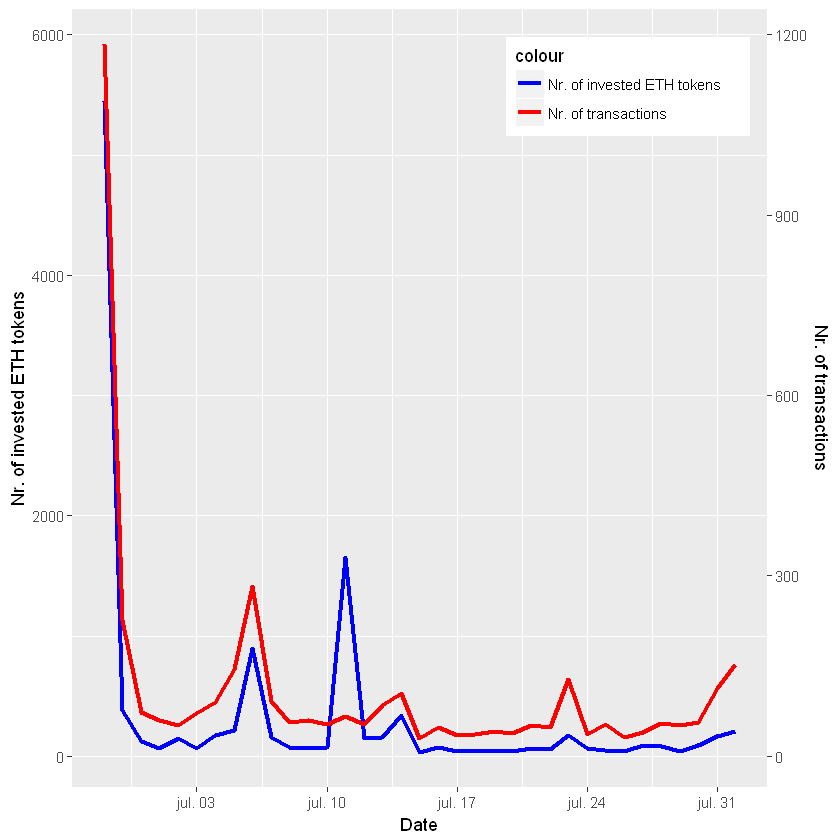

In [6]:
p <- ggplot(df, aes(x = date)) + geom_line(aes(y = sum, colour = "Nr. of invested ETH tokens"),size=1.2) + 
    geom_line(aes(y = count*5, colour = "Nr. of transactions"), size=1.2) + 
    scale_y_continuous(sec.axis = sec_axis(~./5, name = "Nr. of transactions")) + 
    scale_colour_manual(values = c("blue", "red")) + labs(y = "Nr. of invested ETH tokens", x = "Date") + 
    theme(legend.position = c(0.8, 0.9)) #+ ggtitle('Time distribution ')
p

##### Poskus razlage peakov (uparitev):

- 28.6.2017 začetek ICOta, zbranih kar 47% vseh vloženih ETH tokenov. Povezano tudi s tem, da so imeli pre-sale bonus (nekakšen preICO):
https://twitter.com/sun_contract/status/879315509841362944

- 6.7.2017 konec drugega "bonus" obdobja: https://twitter.com/sun_contract/status/882901706379595776

- 11.7.2017 vložil je največji "whale" (https://etherscan.io/address/0x55dcb5c76f993ecf70851392a81ccb90aafebe9d). Glej še spodaj poglavje o whaleih.

- 23.7.2017: zadnji dan bonusov https://twitter.com/sun_contract/status/889091023384739840


Spodnji graf prikazuje še, kako je rastel kumulativni vložek.

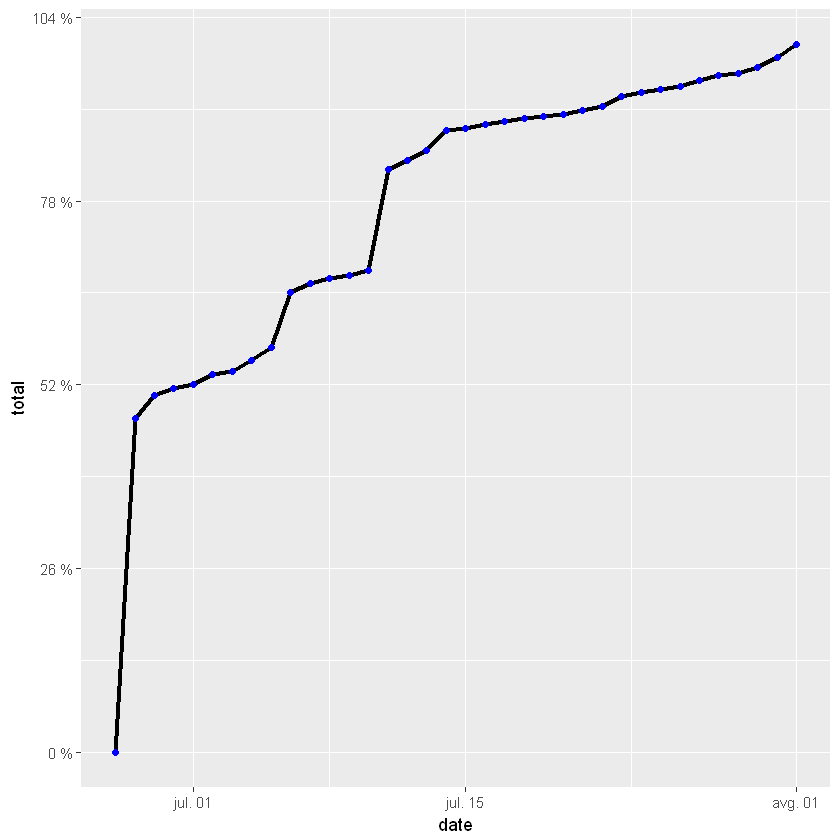

In [27]:
pomozna <- function(x){ 
    paste(round(x/115.55,0), '%')
}
df <- rbind(data.frame(date=as.Date('2017-06-27 08:18:49'), sum = 0, count = 0, total = 0), df)
g <- ggplot(df, aes(x = date)) + geom_line(aes(y = total),size=1.2) + geom_point(aes(y=total), colour='blue') +
        scale_y_continuous(labels=pomozna, limits=c(-0.1, 11556)) 
g

### 2) Distribucija po velikosti

VPRAŠANJA (alineje) IZ MAILA: 
##### - distribucija (po velikostih)

OPIS: Tabela in graf prikazujeta porazdelitev po velikosti vložkov (bucketih).

In [15]:
data['class'] <- data['value'] %/% 0.1
data['class'] <- data['class'] / 10
vecina <- data[data$value <= 2, ]
other <- nrow(data[data$value > 2, ])
vecina$class <- as.character(vecina$class)
velikost <- vecina %>% select(blockNumber, class) %>% group_by(class) %>% summarise(st_transakcij = length(blockNumber))
velikost$class <- as.numeric(velikost$class)
velikost$bucket <- rep(0, nrow(velikost))
for (i in c(1:nrow(velikost))) {
    tmp <- paste(velikost$class[[i]],'-',velikost$class[[i]]+0.1,sep=' ')
    velikost$bucket[[i]] <- tmp
}
velikost$delez_v_procentih <-round((velikost$st_transakcij / 3792)*100,1)
#tele spodnje tri vrstice zakomentiraj, če želiš 'pognati' graf
velikost$class <- NULL
velikost <- velikost[,c('bucket', 'st_transakcij', 'delez_v_procentih')]
velikost

bucket,st_transakcij,delez_v_procentih
0 - 0.1,456,12.0
0.1 - 0.2,335,8.8
0.2 - 0.3,334,8.8
0.3 - 0.4,78,2.1
0.4 - 0.5,148,3.9
0.5 - 0.6,229,6.0
0.6 - 0.7,57,1.5
0.7 - 0.8,31,0.8
0.8 - 0.9,31,0.8
0.9 - 1,184,4.9


In [16]:
sum(velikost$delez_v_procentih)

[1] 79.5

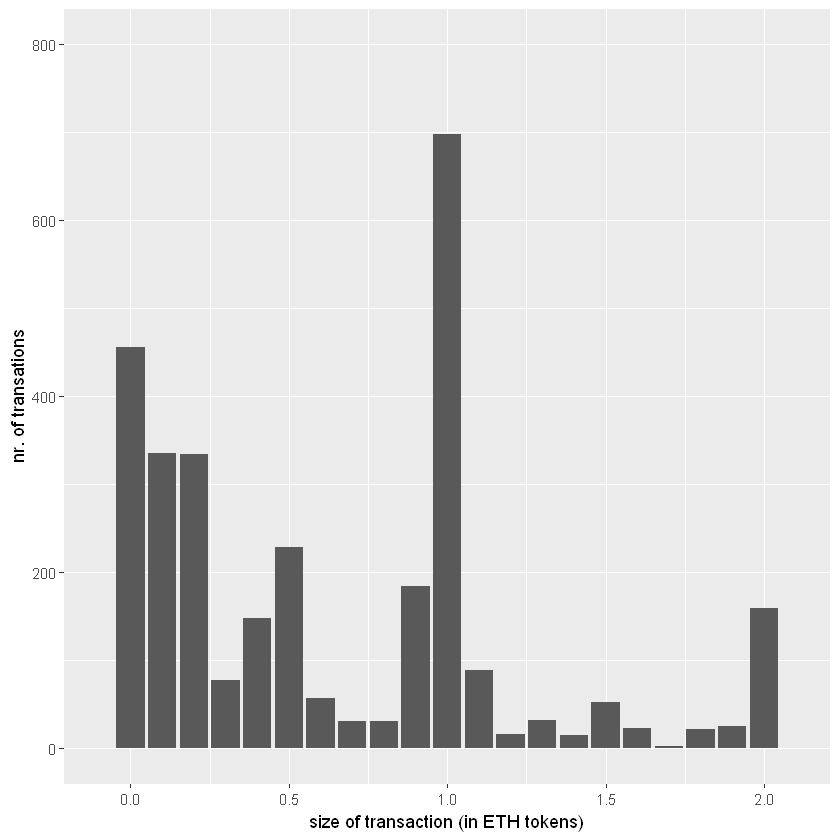

In [14]:
graf <- ggplot(data = velikost, mapping = aes(x = class, y = st_transakcij)) + geom_col() +
        labs(x = "size of transaction (in ETH tokens)", y = "nr. of transations") + xlim(-0.1, 2.1) + ylim(0, 800) #+ 
        #ggtitle('Porazdelitev velikosti transakcij')
graf

Transakcij, pri katerih so vložili več kot 2 ETH tokena, je bilo 773 (20%). Tabela spodaj prikazuje še porazdelitev teh, večjih, vložkov.

In [68]:
other

[1] 773

In [81]:
data['class'] <- data['value'] %/% 10
data['class'] <- data['class'] * 10
ostali <- data[data$value > 2, ]
ostali$class <- as.character(ostali$class)
velikost <- ostali %>% select(blockNumber, class) %>% group_by(class) %>% summarise(st_transakcij = length(blockNumber))
velikost$class <- as.numeric(velikost$class)
velikost$bucket <- rep(0, nrow(velikost))
for (i in c(1:nrow(velikost))) {
    tmp <- paste(velikost$class[[i]],'-',velikost$class[[i]]+10,sep=' ')
    velikost$bucket[[i]] <- tmp
}
velikost <- velikost[with(velikost, order(class)), ]
velikost$bucket[[1]] <- ('2.1 - 10')
velikost$delez_v_procentih <-round((velikost$st_transakcij / 3792)*100,1)
velikost$class <- NULL
velikost <- velikost[,c('bucket', 'st_transakcij', 'delez_v_procentih')]
velikost

bucket,st_transakcij,delez_v_procentih
2.1 - 10,595,15.7
10 - 20,91,2.4
20 - 30,31,0.8
30 - 40,23,0.6
40 - 50,6,0.2
50 - 60,11,0.3
60 - 70,1,0.0
70 - 80,2,0.1
90 - 100,4,0.1
100 - 110,1,0.0


### 3) Whales (največji vložki)

VPRAŠANJE (alineja) IZ MAILA:
##### - kako so veliki whalei


OPIS: tabela prikazuje 10 največjih vložkov. 

In [3]:
whales <- data[with(data, order(-value)), ]
whales <- whales[, c('timeStamp', 'from', 'value')]
head(whales, n=10)

timeStamp,from,value
2017-07-11 11:09:34,0x55dcb5c76f993ecf70851392a81ccb90aafebe9d,1000.000
2017-07-11 09:20:04,0x55dcb5c76f993ecf70851392a81ccb90aafebe9d,500.000
2017-06-28 16:42:20,0x41e066a3dfd1e7f6256d469e2cce042655ae641a,300.000
2017-06-28 16:47:26,0xf43c5295f5cf5bcbd6b94053d0099a2408836b2d,300.000
2017-06-28 14:22:35,0x00d4861037f5978c018816668fa302cfbd550114,299.979
2017-06-28 16:58:57,0xf43c5295f5cf5bcbd6b94053d0099a2408836b2d,273.000
2017-06-28 16:37:13,0x1afe298405c91d552c1625f0b9bd6201023c16ca,150.000
2017-07-14 11:53:21,0xdb827c33e0ee213e9f4a7ce14673413e243ee1c6,150.000
2017-06-28 16:37:27,0xa36fbfbbb005d9489609d8fca7710d287bebda98,100.000
2017-06-28 17:26:19,0x8f066f3d9f75789d9f126fdd7cfbcc38a768985d,99.800


In [4]:
df <- whales %>% select(from, value) %>% 
                        group_by(from) %>% summarise(total = sum(value))
nrow(df)

[1] 2409

In [9]:
df <- df[with(df, order(-total)), ]
head(df, n=20)

from,total
0x55dcb5c76f993ecf70851392a81ccb90aafebe9d,1500.0000
0xf43c5295f5cf5bcbd6b94053d0099a2408836b2d,634.0000
0x41e066a3dfd1e7f6256d469e2cce042655ae641a,300.0000
0x00d4861037f5978c018816668fa302cfbd550114,299.9790
0xe7e9fb5fcf5e7ada35cf3f0cf2f49ae6ac79a72b,202.9284
0x8f066f3d9f75789d9f126fdd7cfbcc38a768985d,198.8900
0x0eeae0cd2c34731f3f06c70be12e8d674cf01aa4,195.2340
0x1afe298405c91d552c1625f0b9bd6201023c16ca,150.0000
0xdb827c33e0ee213e9f4a7ce14673413e243ee1c6,150.0000
0xb4a61fd1770c4a72a95188a9ded340118aa17046,134.2000
